In [1]:
import pandas as pd
data = pd.read_csv('data/ghana_gdp.csv', parse_dates=["year"], index_col = ["year"])
data.rename(columns = {'GDP (current US$)':'GDP'}, inplace = True )
data.head()

,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


<AxesSubplot:xlabel='year'>

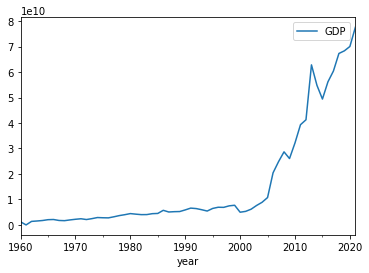

In [2]:
%matplotlib inline 
data.plot()

In [3]:
train_df = data.loc[:"2017-12-31"]
test_df = data.loc["2018-01-01":]
train_df.shape, test_df.shape

((58, 1), (4, 1))

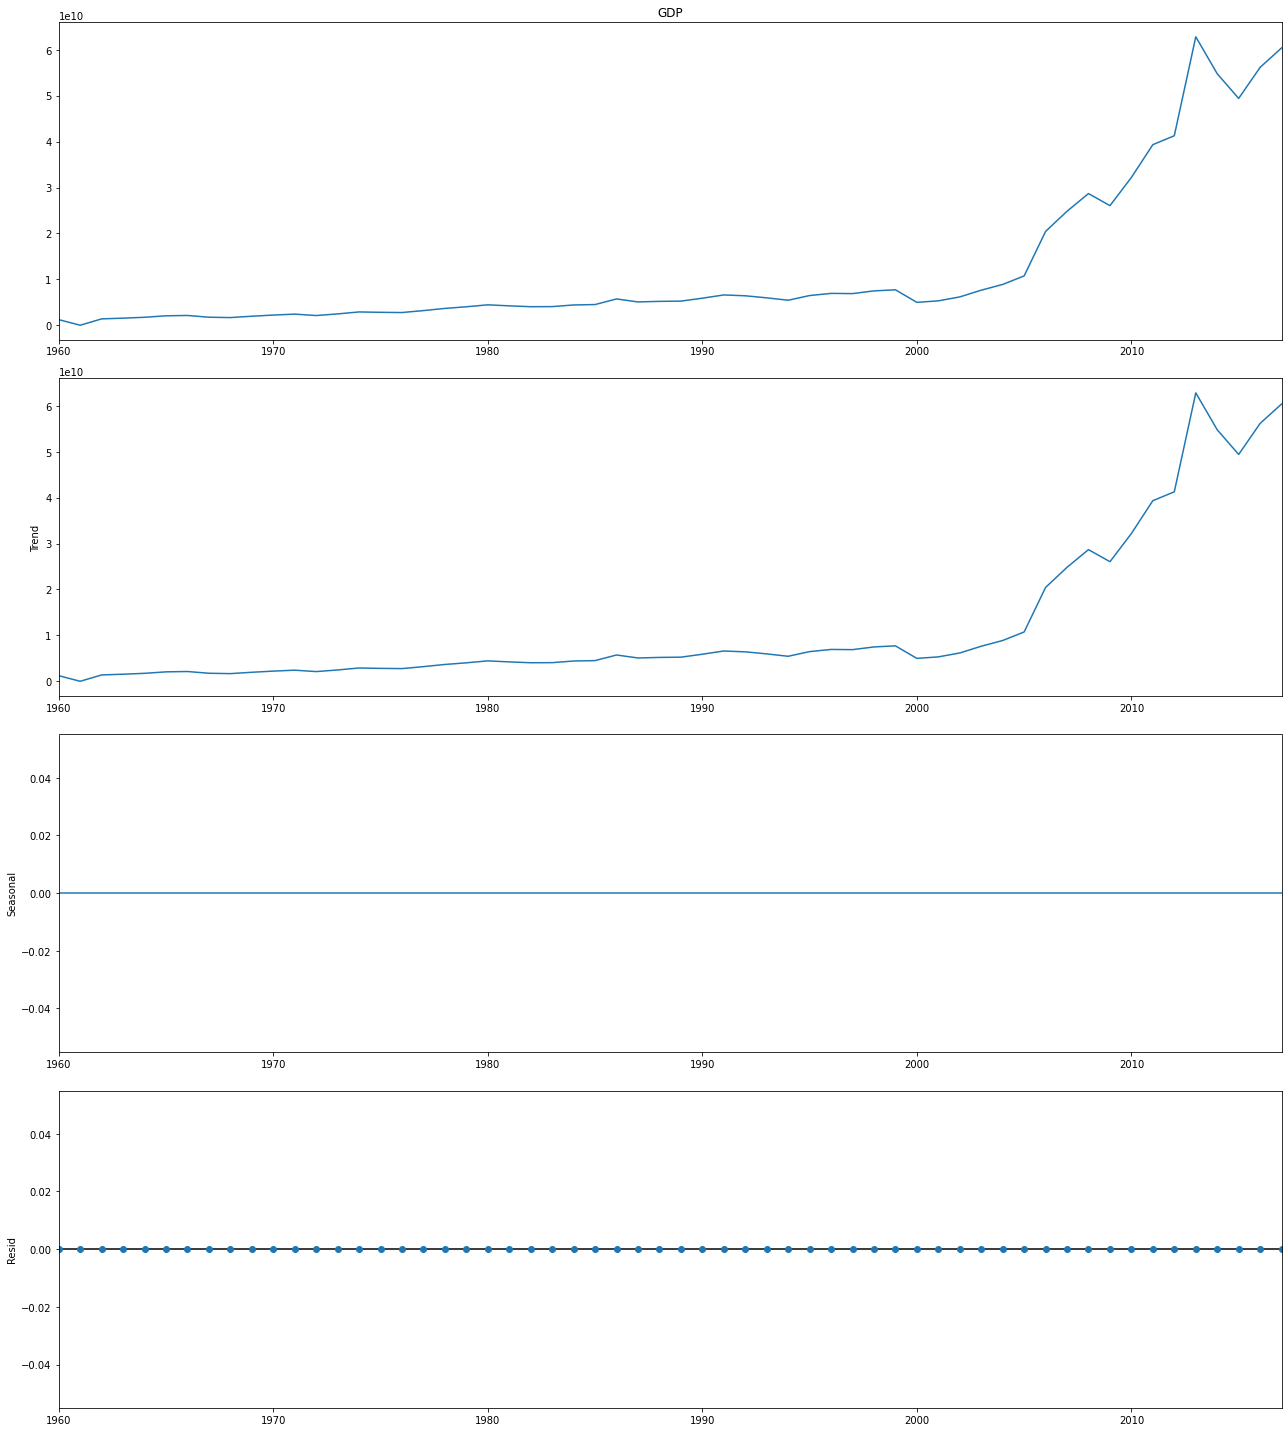

In [4]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df.GDP, model='additive')
result.plot()
plt.show()

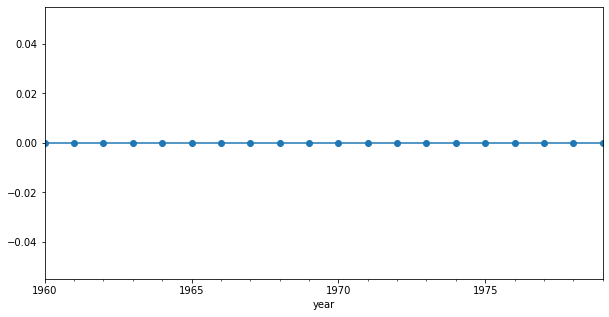

In [5]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker = "o")
plt.show()

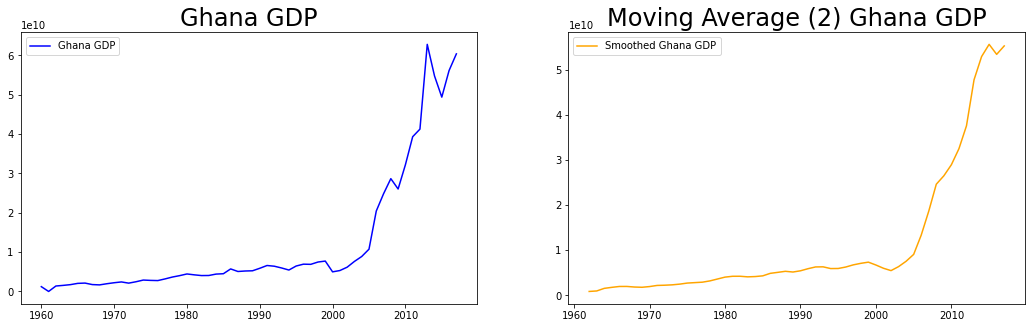

In [14]:
plt.rcParams["figure.figsize"] = 18, 5

fig, ax = plt.subplots(nrows=1, ncols=2)

# Окно в месяц (Window = 3) 
ax[0].plot(train_df.GDP, color = "blue", label = "Ghana GDP")
ax[0].set_title("Ghana GDP", size = 24)
ax[0].legend()

ax[1].plot(train_df.GDP.rolling(window=3).mean(), color = "orange", label = "Smoothed Ghana GDP")
ax[1].set_title("Moving Average (2) Ghana GDP", size = 24)
ax[1].legend()

Тренд чётко прослеживается

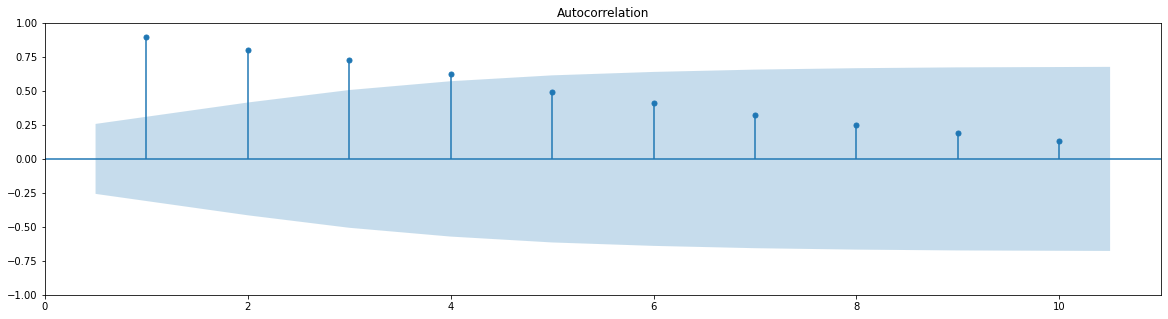

In [15]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.GDP, zero = False, lags = 10)
plt.show()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


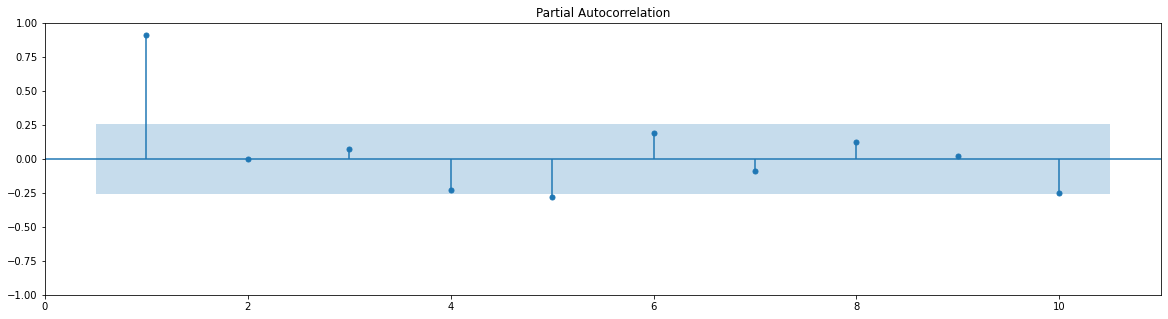

In [16]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.GDP, zero = False, lags = 10)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["GDP"])

(0.5393306248349186,
 0.9860207453998459,
 8,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2146.523587302631)

In [18]:
test1 = adfuller(train_df["GDP"])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')


adf:  0.5393306248349186
p-value:  0.9860207453998459
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому показатели ВВП не являются стационарными

In [21]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 10, ax = axes[0])
    sgt.plot_pacf(series, lags = 10, ax = axes[1])
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


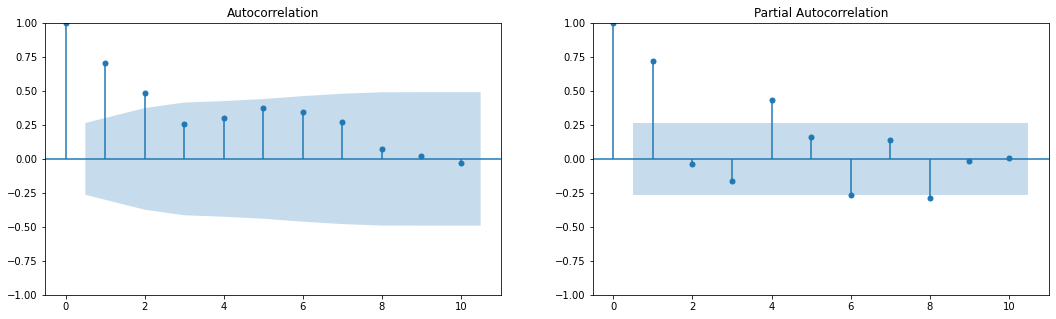

(-2.7881956307520572,
 0.05997982229824655,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 2003.7416835877664)

In [24]:
plot_acf_pacf(train_df["GDP"].diff(3).dropna())
adfuller(train_df["GDP"].diff(3).dropna())

## ARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 2 
- d = 3 
- q = 1

In [32]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["GDP"].dropna(), order = (2, 3, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   58
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1301.212
Date:                Sat, 04 Mar 2023   AIC                           2610.423
Time:                        21:53:38   BIC                           2618.453
Sample:                    01-01-1960   HQIC                          2613.528
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7622      0.129     -5.905      0.000      -1.015      -0.509
ar.L2         -0.5164      0.240     -2.149      0.032      -0.987      -0.045
ma.L1         -0.9743      0.106     -9.193      0.000      -1.182      -0.767
sigma2      3.044e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               175.50
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):             407.41   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.86e+56. Standard errors may be unstable.
"""

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [33]:
pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = arima_model_fit.predict(start = test_df.index[1], end = test_df.index[-1])


pred_df["GDP"] = data["GDP"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP"]

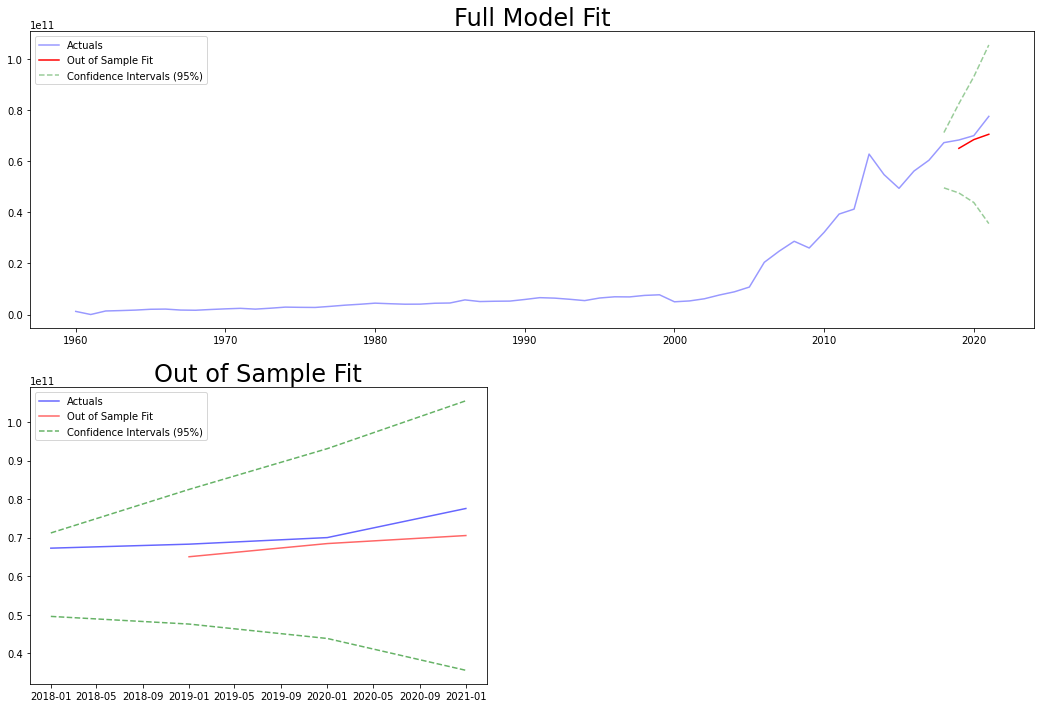

In [34]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

In [35]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, seasonal=False,
                         d=3, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2619.511, Time=0.06 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2686.859, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2659.570, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2610.423, Time=0.05 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2631.764, Time=0.02 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2610.925, Time=0.06 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2627.500, Time=0.03 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2612.413, Time=0.07 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.852 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1301.212
Date:                Sat, 04 Mar 2023   AIC                           2610.423
Time:                        21:53:39   BIC                           2618.453
Sample:                    01-01-1960   HQIC                          2613.528
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7622      0.129     -5.905      0.000      -1.015      -0.509
ar.L2         -0.5164      0.240     -2.149      0.032      -0.987      -0.045
ma.L1         -0.9743      0.106     -9.193      0.000      -1.182      -0.767
sigma2      3.044e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               175.50
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):             407.41   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.86e+56. Standard errors may be unstable.
"""